In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
from sklearn.datasets import load_iris
feature_names = ['sepal_length','sepal_width'] #,'petal_length','petal_width']
irisDF = pd.DataFrame(data=X, columns=feature_names)

Text(0, 0.5, 'Sepal Width')

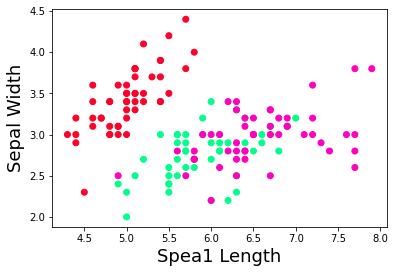

In [3]:
# raw data cmap 
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# Clustering (군집분석)  

비지도 학습의 일종으로 유사한 데이터끼리 그룹화 시키는 학습 모델  
- 각 데이터의 유사성을 측정하여, 유사성이 높은 집단끼리 분류

- Kmeans: 사용자가 지정한 k개의 군집으로 군집화  
- Hierarchical Clustering: 계층적 구조를 형성하여 군집화  
- DBSCAN: 데이터의 밀도를 기반으로 하여 군집화  

## Kmeans

각 군집에 할당된 포인트들의 평균 좌표를 이용해서 중심점을 반복적으로 업데이트하며 군집을 형성하는 알고리즘

1. 각 데이터 포인트에 대해서 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집을 할당  
2. 할당된 군집을 기반으로 새로운 중심(군집 내부 점들의 좌표 평균)을 계산  
3. 각 클러스터의 할당된 중심점이 바뀌지 않을 때까지 반복

### 군집을 형성을 갯수 설정

#### Elbow Method

- TSS(전체분산) = WSS(같은 군집 내 분산) + BSS(다른 군집간 분산)  
- 잘 분류된 군집일 수록, WSS 값은 낮고, BSS 값은 높은 특징  
- BSS/TSS의 값이 높거나, WSS의 값이 낮을 때, 잘 분류되었다고 판단  
- 군집의 갯수가 증가할 수록 WSS의 값은 감소하는 특징을 보이나, 무작정 군집의 수가 많은 것이 좋은 것은 아니므로, elbow point로 판단  
- WSS의 값은 interia_로 판단가능

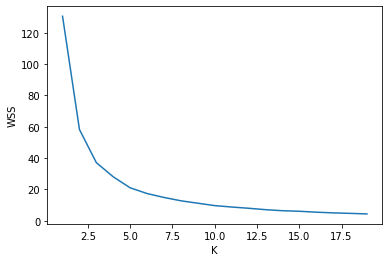

In [4]:
from sklearn.cluster import KMeans

wss=[]
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k).fit(X)
    wss.append(km_k.inertia_)

plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

#### Silhouette Method

- 객체가 속한 군집 내의 데이터들과의 유사성을 계산하는 방식  
- (b-a)/max(a,b)를 통해 계산  
- a는 같은 군집 내의 데이터 간 거리 평균, b는 다른 군집과의 데이터 간 거리 평균의 최솟값  
- 실루엣 계수는 -1과 1사이의 값, 1에 가까울 수록 군집화가 잘 이루어졌음을 의미  

In [9]:
from sklearn.preprocessing import scale
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [10]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

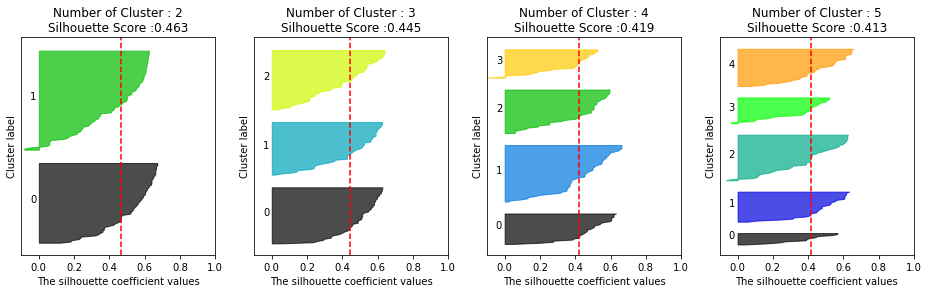

In [13]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], X)

In [7]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=42)
km.fit(X)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=42)

Text(0.5, 1.0, 'Predicted')

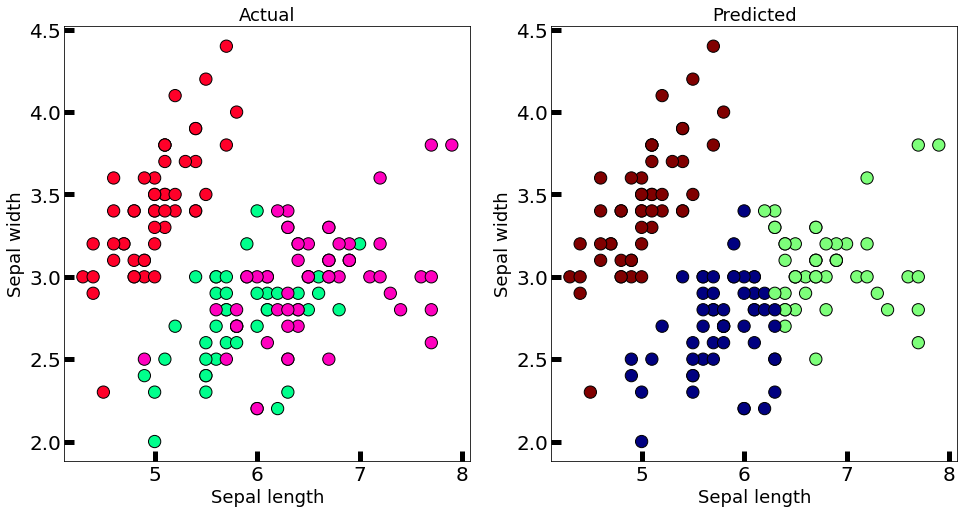

In [8]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

- 클러스터의 크기나 밀집도가 서로 다를 경우나, 데이터가 원형이 아닐 경우에는 잘 작동하지 않는다는 단점이 존재  
- 따라서 kmeans를 실시하기 전에 입력 특성의 스케일을 맞추는 것이 일반적으로 더 좋은 결과를 산출  

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_s = StandardScaler().fit_transform(X)
X_s = pd.DataFrame(X_s, columns=feature_names)

km = KMeans(n_clusters=3).fit(X_s)

X_s['cluster_km']=km.labels_
X_s['cluster_km']=X_s['cluster_km'].astype('category')

X_s.cluster_km.value_counts()

0    56
2    50
1    44
Name: cluster_km, dtype: int64

Text(0.5, 1.0, 'Predicted')

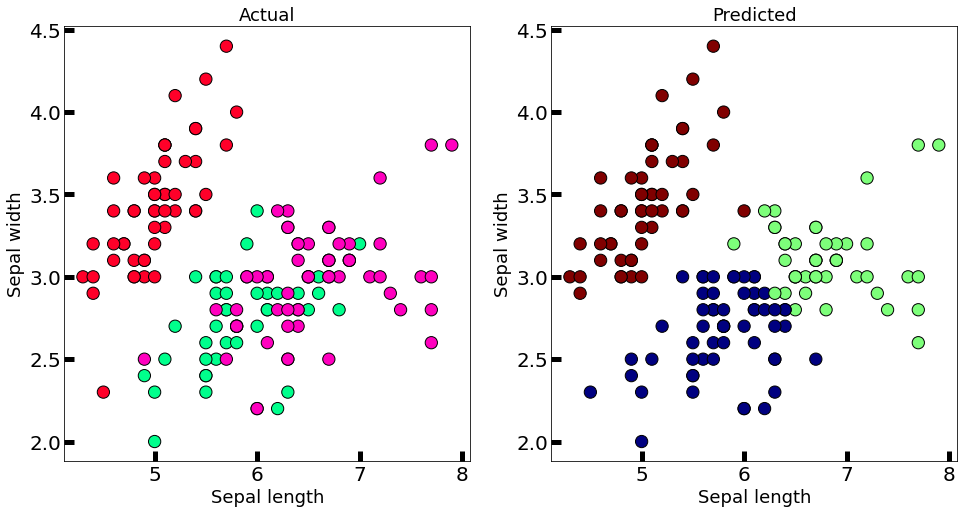

In [25]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## Kmedoids

- K-means clustering은 초기 중심 값에 민감한 반응을 보이고, 노이즈와 아웃라이어에 모델이 민감하다는 단점  
- 군집의 무게 중심을 구하기 위해서 데이터의 평균대신 중간점(medoids)를 사용  
- K-medoids는 대신 데이터 간의 모든 거리 비용을 반복하여 계산해야하기에 K-means보다는 상대적으로 많은 시간이 소요  
- K-means와 K-medoids 모두 원형의 군집이 아닌 경우에 군집화를 이루기가 어렵다는 단점

In [30]:
from sklearn_extra.cluster import KMedoids
irisDF = irisDF.iloc[:,:2]
kmd = KMedoids(n_clusters=3, random_state=0).fit(X)

irisDF['cluster_kmd'] = kmd.labels_
irisDF['cluster_kmd'] = irisDF['cluster_kmd'].astype('category')

irisDF.cluster_kmd.value_counts()

C:\Users\zyunhyeok\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


0    51
1    51
2    48
Name: cluster_kmd, dtype: int64

Text(0.5, 1.0, 'Predicted')

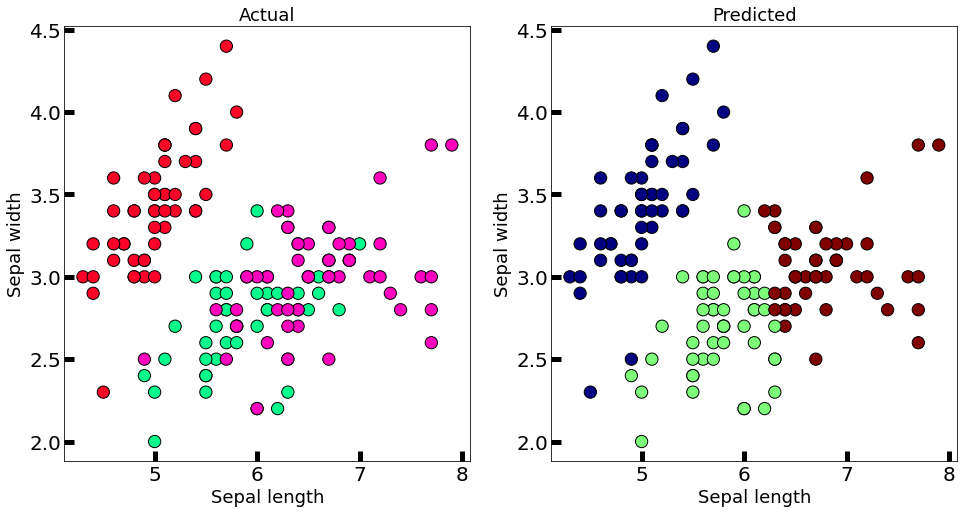

In [31]:
new_labels = kmd.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## DBSCAN

- K-means clustering의 초기 중심으로 설정한 값에 크게 영향을 받고 노이즈와 아웃라이어에 민감하다는 단점, 군집의 개수 K를 설정하는 것도 쉽지 않다는 단점을 상대적으로 극복  
- eps-neighbors와 MinPts를 사용하여 군집을 구성  
- eps-neighbors는 한 데이터를 중심으로 epsilon 거리 이내에 데이터를 한 군집으로 구성한다고 명시하는 parameter  
- MinPts는 한 군집은 MinPts보다 많거나 같은 수의 데이터로 구성된다는 것이다. 만약 MinPts보다 적은 수의 데이터가 eps-neighbors를 형성하면 noise로 취급을 한다. 즉, 군집을 형성하기 위해서는 최소한의 일정 데이터수가 필요  
- 즉, 해당 범위 내에 min_samples 개 샘플이 존재한다면, 핵심 샘플로 간주, 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 군집으로 간주  
- 핵심 샘플도 아니고, 이웃도 아닌 샘플은 이상치로 판단 (인덱스: core_sample_indices_ = -1)  
- 클러스터의 모양과 갯수에 상관없이 감지가 가능하고, 이상치에 안정적  
- 밀도에 따라 클러스터를 연결하기 때문에 기하학적인 모양을 갖는 군집도 찾을 수 있음  
- 하지만 클러스터 간의 밀집도가 크게 다르면, 모든 클러스터를 올바르게 잡아내는 것은 불가능

In [32]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [34]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

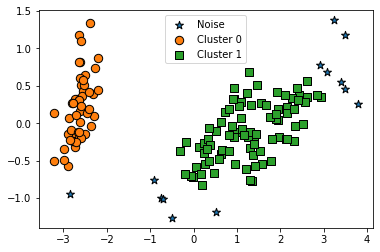

In [35]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


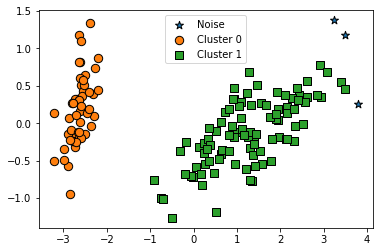

In [38]:
from sklearn.cluster import DBSCAN

# eps를 0.8로 변경
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


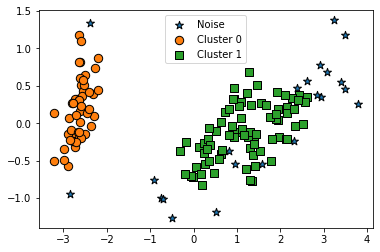

In [39]:
# eps를 0.6, min_samples를 16으로 변경
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

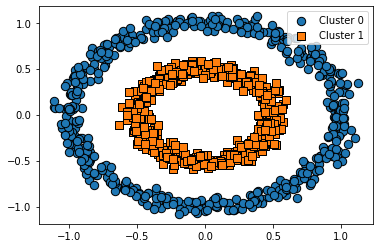

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

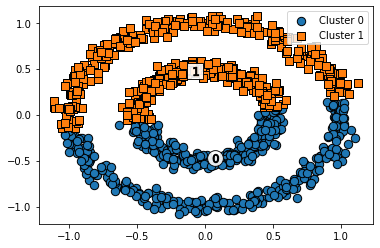

In [41]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

# todo : Kmeans 객체 생성 
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


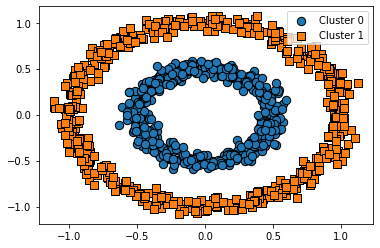

In [53]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

# todo : DBSCAN 객체 생성 
dbscan = DBSCAN(eps=0.2, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
